# Multi-layer Perceptron (MLP)

- **Training set**: LO_SARD102
- **Test/Validation set:** JTT
- **Features**: word2vec average
- **Class imbalance processing**: SMOTE Oversampling

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

/home/scheuererra68323/venv37/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Load labeled dataset

In [2]:
dataset = pd.read_hdf("/mnt/md0/user/scheuererra68323/LO_SARD102/LO_SARD102_word2vec.h5")
testset = pd.read_hdf("/mnt/md0/user/scheuererra68323/JTT/JTT_word2vec.h5")
print(dataset.shape)
print(dataset.is_vulnerable.value_counts())
print()
print(testset.shape)
print(testset.is_vulnerable.value_counts())

(292724, 2)
0.0    269721
1.0     23003
Name: is_vulnerable, dtype: int64

(24999, 2)
0.0    24171
1.0      828
Name: is_vulnerable, dtype: int64


## Prepare train and test datasets

In [4]:
# randomize both datasets
dataset = dataset.sample(frac=1).reset_index(drop=True)
testset = testset.sample(frac=1).reset_index(drop=True)

X_train, X_val, Y_train, Y_val = train_test_split(
    dataset.word2vec_avg,
    dataset.is_vulnerable,
    test_size=0.2,
    stratify=dataset.is_vulnerable,
    random_state=0
)
X_test, Y_test = testset.word2vec_avg, testset.is_vulnerable

X_train = numpy.stack(X_train, axis=0)
Y_train = numpy.stack(Y_train, axis=0)
X_val = numpy.stack(X_val, axis=0)
Y_val = numpy.stack(Y_val, axis=0)
X_test = numpy.stack(X_test, axis=0)
Y_test = numpy.stack(Y_test, axis=0)

print("Training Set:")
print(f"{len(X_train)} total")
print(Counter(Y_train))
print()      
print("Validation Set:")
print(f"{len(X_val)} total")
print(Counter(Y_val))
print()      
print("Test Set:")
print(f"{len(X_test)} total")
print(Counter(Y_test))

Training Set:
234179 total
Counter({0.0: 215777, 1.0: 18402})

Validation Set:
58545 total
Counter({0.0: 53944, 1.0: 4601})

Test Set:
24999 total
Counter({0.0: 24171, 1.0: 828})


## SMOTE Oversampling

In [5]:
X_train, Y_train = oversample_smote(X_train, Y_train)

imbalanced_learn version  0.7.0
Counter output before SMOTE: Counter({0.0: 215777, 1.0: 18402})
Counter output after SMOTE: Counter({0.0: 215777, 1.0: 215777})


## Model definition & Training

In [12]:
init_mode = 'glorot_uniform'
model = keras.Sequential(
    [
        layers.Dense(64,
                     input_dim=100,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),


        layers.Dropout(0.1),

        layers.Dense(64,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),

        layers.Dense(64,
                     kernel_initializer=init_mode,
                     activation=tf.nn.relu),


        layers.Dense(1, 
                     kernel_initializer=init_mode, 
                     activation=tf.nn.sigmoid),
    ]
)
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=0.03, momentum=0.9, decay=0.001),
              metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=X_train.shape[0],
                    epochs=200,
                    verbose=True,
                    validation_data=(X_val, Y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                6464      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________
Train on 431554 samples, validate on 58545 samples
Epoch 1/200
431554/431554 [==============================] - 1s 2

Epoch 48/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.2521 - accuracy: 0.9004 - val_loss: 0.2432 - val_accuracy: 0.8876
Epoch 49/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.2495 - accuracy: 0.9013 - val_loss: 0.2366 - val_accuracy: 0.8917
Epoch 50/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.2466 - accuracy: 0.9031 - val_loss: 0.2280 - val_accuracy: 0.8958
Epoch 51/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.2434 - accuracy: 0.9047 - val_loss: 0.2208 - val_accuracy: 0.9011
Epoch 52/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.2408 - accuracy: 0.9065 - val_loss: 0.2171 - val_accuracy: 0.9033
Epoch 53/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.2381 - accuracy: 0.9073 - val_loss: 0.2164 - val_accuracy: 0.9033
Epoch 54/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.23

Epoch 102/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1731 - accuracy: 0.9317 - val_loss: 0.1538 - val_accuracy: 0.9358
Epoch 103/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1722 - accuracy: 0.9316 - val_loss: 0.1528 - val_accuracy: 0.9367
Epoch 104/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1710 - accuracy: 0.9325 - val_loss: 0.1519 - val_accuracy: 0.9368
Epoch 105/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1707 - accuracy: 0.9328 - val_loss: 0.1506 - val_accuracy: 0.9374
Epoch 106/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1701 - accuracy: 0.9327 - val_loss: 0.1498 - val_accuracy: 0.9380
Epoch 107/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1693 - accuracy: 0.9333 - val_loss: 0.1497 - val_accuracy: 0.9380
Epoch 108/200
431554/431554 [==============================] - 0s 1us/sample - los

Epoch 156/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1429 - accuracy: 0.9476 - val_loss: 0.1275 - val_accuracy: 0.9566
Epoch 157/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1427 - accuracy: 0.9478 - val_loss: 0.1262 - val_accuracy: 0.9568
Epoch 158/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1422 - accuracy: 0.9482 - val_loss: 0.1258 - val_accuracy: 0.9566
Epoch 159/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1417 - accuracy: 0.9484 - val_loss: 0.1262 - val_accuracy: 0.9566
Epoch 160/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1413 - accuracy: 0.9484 - val_loss: 0.1263 - val_accuracy: 0.9565
Epoch 161/200
431554/431554 [==============================] - 0s 1us/sample - loss: 0.1411 - accuracy: 0.9487 - val_loss: 0.1257 - val_accuracy: 0.9570
Epoch 162/200
431554/431554 [==============================] - 0s 1us/sample - los

## Evaluation

              precision    recall  f1-score   support

         0.0       0.99      0.34      0.50     24171
         1.0       0.05      0.92      0.09       828

    accuracy                           0.36     24999
   macro avg       0.52      0.63      0.29     24999
weighted avg       0.96      0.36      0.49     24999

Confusion matrix:
[[ 8122 16049]
 [   70   758]]

Confusion matrix (Percentages):
[[32.489 64.199]
 [ 0.28   3.032]]

Metrics:
Sensitivity (TPR): 0.915459
Specifity (TNR):   0.336023

FPR: 0.663977
FNR: 0.084541

Balanced accuracy: 0.625741

Test loss:	1.087359
Test accuracy:	0.355214


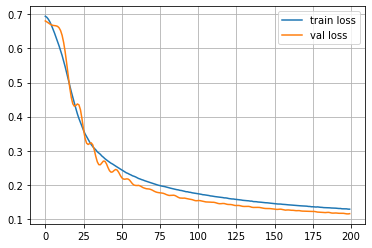

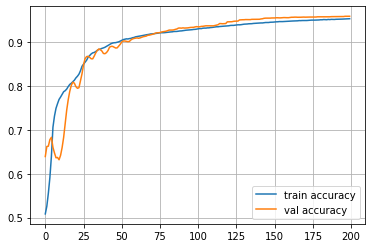

In [13]:
Y_pred = numpy.round(model.predict(X_test))

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [14]:
model.save('testJTT_MLP_word2vec_SMOTE')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: testJTT_MLP_word2vec_SMOTE/assets


## Discussion
High sensitivity of 91.5%, tradeoff: two thirds are fp / "false alarms"